In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [2]:
#Uploading the data
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df = data.copy()

In [3]:
#Checking the data
data.CAEC.unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [4]:
data.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [5]:
#Checking the data
data.NCP.unique()

array([3.  , 1.  , 4.  , 3.29, 1.73, 2.58, 1.6 , 1.74, 1.11, 2.08, 1.89,
       2.86, 3.77, 3.69, 3.16, 1.08, 3.56, 3.89, 3.24, 3.9 , 3.11, 3.59,
       2.06, 2.  , 3.82, 3.09, 3.75, 3.57, 3.73, 3.52, 1.26, 1.27, 3.3 ,
       3.65, 3.54, 1.72, 2.88, 3.63, 1.47, 3.17, 3.49, 2.99, 2.13, 3.91,
       3.7 , 3.18, 3.8 , 1.63, 3.76, 3.37, 2.71, 3.34, 2.22, 2.89, 3.5 ,
       3.19, 1.7 , 2.81, 1.61, 1.88, 2.33, 1.99, 2.97, 3.72, 3.38, 3.26,
       3.99, 3.25, 1.16, 3.41, 3.28, 3.21, 3.47, 3.44, 3.04, 3.64, 2.65,
       3.42, 2.64, 2.63, 3.1 , 3.13, 3.97, 3.71, 3.83, 3.58, 3.27, 3.43,
       3.53, 1.23, 1.06, 3.6 , 3.74, 3.45, 1.51, 2.78, 3.94, 3.05, 2.98,
       1.39, 1.58, 3.62, 3.36, 1.15, 3.98, 1.92, 2.11, 1.1 , 1.3 , 2.66,
       2.45, 2.79, 1.13, 2.49, 3.61, 3.95, 2.95, 2.8 , 2.23, 1.2 , 1.56,
       1.05, 1.19, 3.39, 3.55, 2.37, 1.21, 1.59, 2.73, 1.07, 1.41, 2.75,
       2.74, 2.61, 3.31, 2.34, 1.71, 3.06, 3.2 , 1.14, 3.32, 2.94, 2.85,
       3.48, 2.39, 2.76, 3.12, 1.87, 2.12, 2.96, 2.

In [6]:
#Checking for min and max values
data.NCP.describe()

count    2111.000000
mean        2.685651
std         0.778079
min         1.000000
25%         2.660000
50%         3.000000
75%         3.000000
max         4.000000
Name: NCP, dtype: float64

In [7]:
#checking fot null values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
#Data Cleaning
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool

In [9]:
#checking data types in dataframe
print(df.dtypes)

Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [10]:
#Encoding binary columns using LabelEncoder from sklearn library 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

binary_columns = ['SMOKE', 'SCC', 'family_history_with_overweight', 'FAVC', 'Gender']

for column in binary_columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0   21    1.62    64.0                               1     0   2.0   
1       0   21    1.52    56.0                               1     0   3.0   
2       1   23    1.80    77.0                               1     0   2.0   
3       1   27    1.80    87.0                               0     0   3.0   
4       1   22    1.78    89.8                               0     0   2.0   

   NCP       CAEC  SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes      0   2.0    0  0.0  1.0          no   
1  3.0  Sometimes      1   3.0    1  3.0  0.0   Sometimes   
2  3.0  Sometimes      0   2.0    0  2.0  1.0  Frequently   
3  3.0  Sometimes      0   2.0    0  2.0  0.0  Frequently   
4  1.0  Sometimes      0   2.0    0  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transporta

In [11]:
#displaying all columns
pd.set_option("display.max_columns", None)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [12]:
#Creating a new variable 
new_nominal = ['MTRANS_Bike','MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking','CALC_Frequently','CALC_Sometimes','CALC_no']


In [13]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [14]:
#Encoding the CAEC column
encoder_1 = LabelEncoder()

df['CAEC'] = encoder_1.fit_transform(df['CAEC'])
df['MTRANS']= encoder_1.fit_transform(df['MTRANS'])
df['CALC'] = encoder_1.fit_transform(df['CALC'])

In [15]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


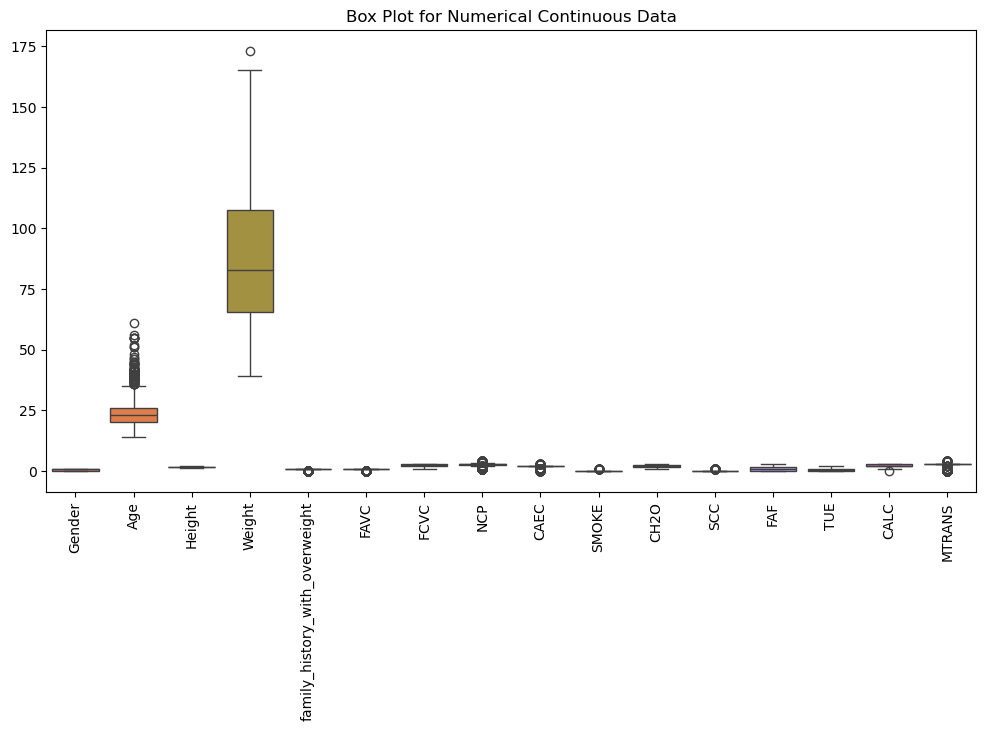

In [16]:
#Checking for outliers
numeric_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])

plt.xticks(rotation=90)
plt.title("Box Plot for Numerical Continuous Data")
plt.show()

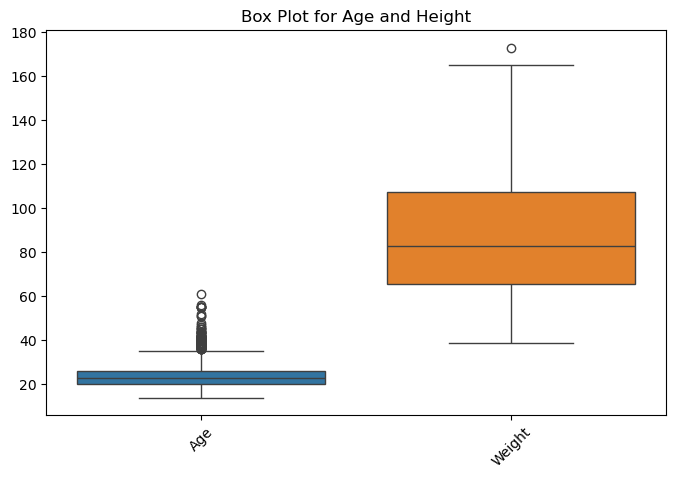

In [17]:
#Checking for outliers only for Age and Weight
selected_columns = ["Age", "Weight"]

plt.figure(figsize=(8, 5))
sns.boxplot(data=df[selected_columns])

plt.xticks(rotation=45)
plt.title("Box Plot for Age and Height")
plt.show()

In [18]:
# Encoding target into numerical data
le_target = LabelEncoder()
df['NObeyesdad'] = le_target.fit_transform(df['NObeyesdad'])

# Splitting data into features (X) and target (y)
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Splitting into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Train Logistic Regression (baseline model)
log_reg = LogisticRegression(max_iter=1000, multi_class='ovr')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

#Print evaluation metrics
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report - Logistic Regression")
print(classification_report(y_test, y_pred_log))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.7328605200945626

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        54
           1       0.67      0.55      0.60        58
           2       0.61      0.71      0.66        70
           3       0.81      0.98      0.89        60
           4       1.00      0.98      0.99        65
           5       0.61      0.64      0.62        58
           6       0.51      0.36      0.42        58

    accuracy                           0.73       423
   macro avg       0.72      0.73      0.72       423
weighted avg       0.73      0.73      0.72       423



In [20]:
# Train Random Forest (baseline model)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
#Print evaluation metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9550827423167849

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.83      1.00      0.91        58
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.96      0.88      0.92        58
           6       0.96      0.93      0.95        58

    accuracy                           0.96       423
   macro avg       0.96      0.95      0.95       423
weighted avg       0.96      0.96      0.96       423



In [21]:
# Train XGBoost (Baseline model)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Print evaluation metrics: 
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9574468085106383

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        54
           1       0.85      0.95      0.89        58
           2       0.97      0.97      0.97        70
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.98      0.91      0.95        58
           6       0.97      0.98      0.97        58

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:41:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


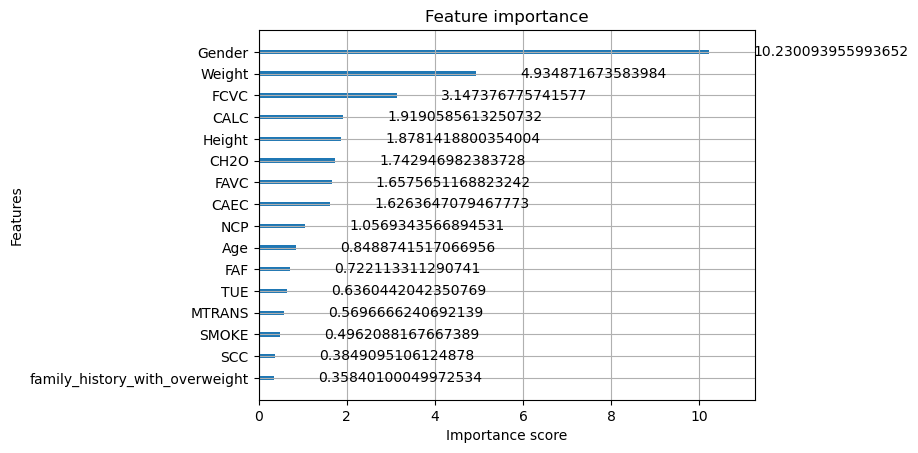

In [22]:
# Feature Importance based on XGBoost(baseline) and importance_type='gain'
plot_importance(xgb, importance_type='gain')

plt.show()

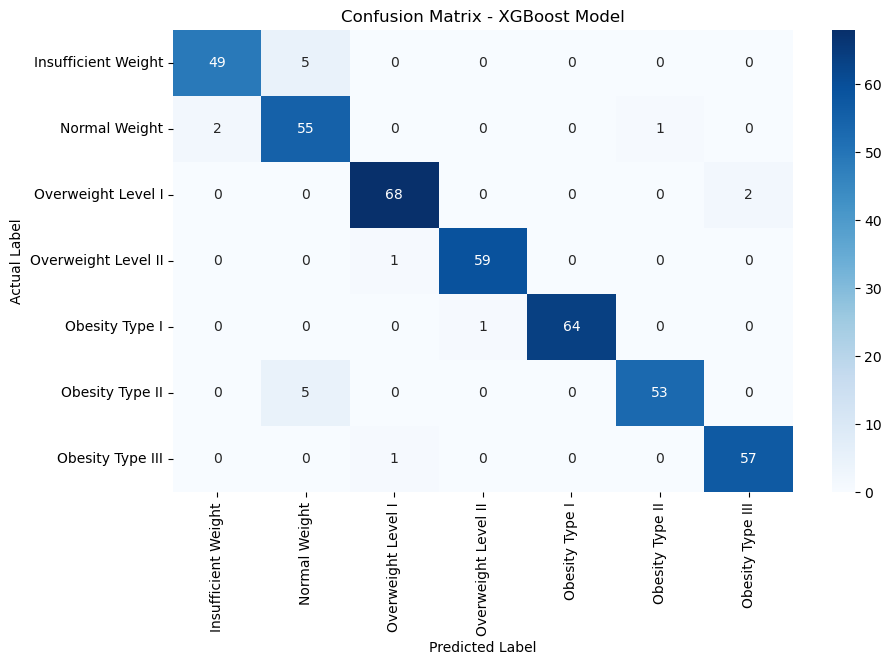

In [23]:
#Confusion Matrix for XGBoost Model(baseline)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xgb)

class_labels = ["Insufficient Weight", "Normal Weight", "Overweight Level I", 
                "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"]

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - XGBoost Model")
plt.show()

In [24]:
#Dropping columns with low importance
df = df.drop(['family_history_with_overweight', 'SCC', 'SMOKE','MTRANS','TUE','FAF', 'Age'], axis=1)
print(df)


      Gender  Height  Weight  FAVC  FCVC  NCP  CAEC  CH2O  CALC  NObeyesdad
0          0    1.62   64.00     0   2.0  3.0     2  2.00     3           1
1          0    1.52   56.00     0   3.0  3.0     2  3.00     2           1
2          1    1.80   77.00     0   2.0  3.0     2  2.00     1           1
3          1    1.80   87.00     0   3.0  3.0     2  2.00     1           5
4          1    1.78   89.80     0   2.0  1.0     2  2.00     2           6
...      ...     ...     ...   ...   ...  ...   ...   ...   ...         ...
2106       0    1.71  131.41     1   3.0  3.0     2  1.73     2           4
2107       0    1.75  133.74     1   3.0  3.0     2  2.01     2           4
2108       0    1.75  133.69     1   3.0  3.0     2  2.05     2           4
2109       0    1.74  133.35     1   3.0  3.0     2  2.85     2           4
2110       0    1.74  133.47     1   3.0  3.0     2  2.86     2           4

[2111 rows x 10 columns]


In [25]:
df.head()

,Gender,Height,Weight,FAVC,FCVC,NCP,CAEC,CH2O,CALC,NObeyesdad
0,0,1.62,64.0,0,2.0,3.0,2,2.0,3,1
1,0,1.52,56.0,0,3.0,3.0,2,3.0,2,1
2,1,1.80,77.0,0,2.0,3.0,2,2.0,1,1
3,1,1.80,87.0,0,3.0,3.0,2,2.0,1,5
4,1,1.78,89.8,0,2.0,1.0,2,2.0,2,6


## Adding BMI

In [26]:
#Creating a new column for BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

In [27]:
# Encoding target into numerical data
le_target = LabelEncoder()
df['NObeyesdad'] = le_target.fit_transform(df['NObeyesdad'])

# Splitting data into features (X) and target (y)
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Splitting into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
# Train XGBoost (Model after dropping columns and adding BMI)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Print evaluation metrics: 
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9810874704491725

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       0.97      0.98      0.97        58
           2       0.99      1.00      0.99        70
           3       0.98      1.00      0.99        60
           4       1.00      0.98      0.99        65
           5       0.96      0.95      0.96        58
           6       0.98      0.95      0.96        58

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:41:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


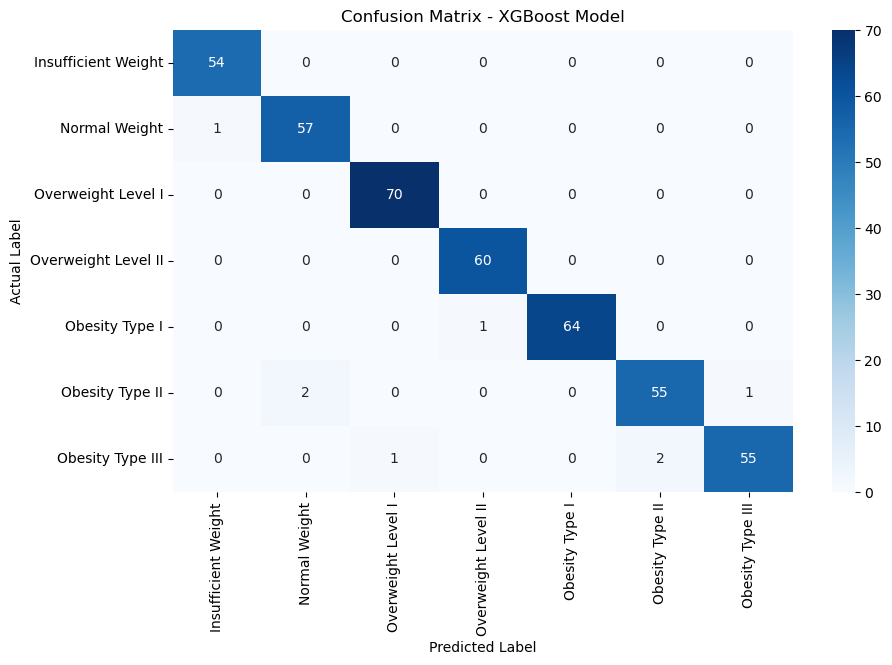

In [29]:
#Checking again confusion matrix after dropping columns and adding BMI
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xgb)

class_labels = ["Insufficient Weight", "Normal Weight", "Overweight Level I", 
                "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"]

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - XGBoost Model")
plt.show()

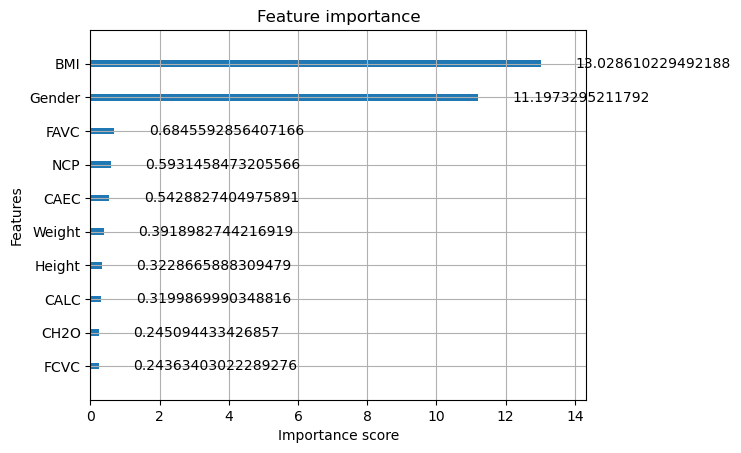

In [30]:

plot_importance(xgb, importance_type='gain')
plt.show()

In [31]:
#Dropping Weight and Height columns after creating BMI
df = df.drop(['Weight','Height'], axis = 'columns')

In [32]:
#XY Split
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Splitting into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# Train XGBoost (Model after dropping columns, height and weight included and adding BMI)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Print evaluation metrics: 
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:41:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9739952718676123

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       0.98      0.95      0.96        58
           2       0.99      0.97      0.98        70
           3       0.98      1.00      0.99        60
           4       1.00      1.00      1.00        65
           5       0.93      0.95      0.94        58
           6       0.95      0.95      0.95        58

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



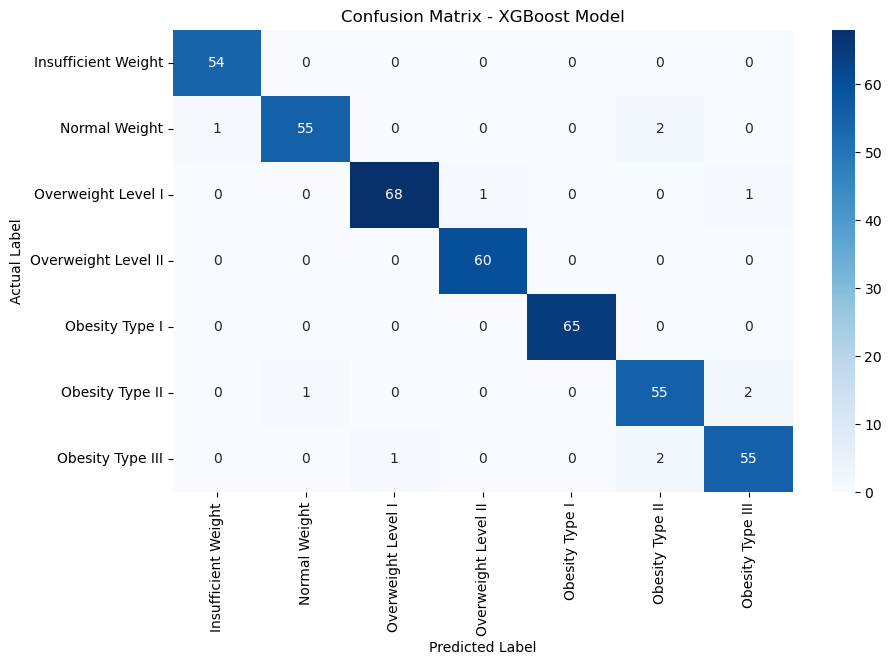

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xgb)

class_labels = ["Insufficient Weight", "Normal Weight", "Overweight Level I", 
                "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"]

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - XGBoost Model")
plt.show()

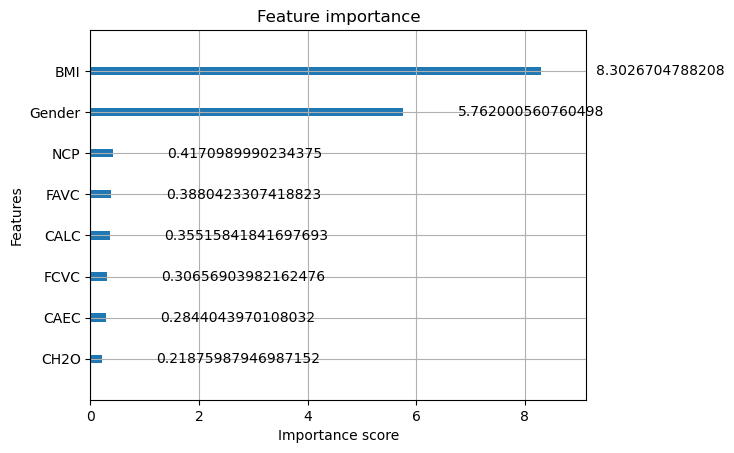

In [35]:
#Feature Importance after dropping columns and adding BMI
plot_importance(xgb, importance_type='gain')
plt.show()

In [36]:
#Train Logistic Regression (Model after dropping columns, height and weight included and adding BMI)
log_reg = LogisticRegression(max_iter=1000, multi_class='ovr')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report - Logistic Regression")
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.7304964539007093

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       0.75      0.47      0.57        58
           2       0.55      0.70      0.62        70
           3       0.84      0.97      0.90        60
           4       1.00      1.00      1.00        65
           5       0.53      0.69      0.60        58
           6       0.50      0.28      0.36        58

    accuracy                           0.73       423
   macro avg       0.73      0.73      0.72       423
weighted avg       0.73      0.73      0.72       423



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [37]:
# Train Random Forest (Model after dropping columns, height and weight included and adding BMI)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9716312056737588

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.93      0.98      0.96        58
           2       0.99      0.99      0.99        70
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.96      0.91      0.94        58
           6       0.93      0.95      0.94        58

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



In [38]:
#save the model for streamlit app
import joblib
joblib.dump(xgb, 'xgb_model.pkl')


['xgb_model.pkl']

In [39]:
#extract the most important features from xgboost model
features = X.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]


In [40]:
# Create a DataFrame from the feature importance data

sorted_feature_df = pd.DataFrame({
    'Feature': features[indices],
    'Importance': importances[indices]
})

In [41]:
sorted_feature_df.head(8)

,Feature,Importance
0,BMI,0.517794
1,Gender,0.359346
2,NCP,0.026012
3,FAVC,0.024200
4,CALC,0.022149
5,FCVC,0.019119
6,CAEC,0.017737
7,CH2O,0.013643


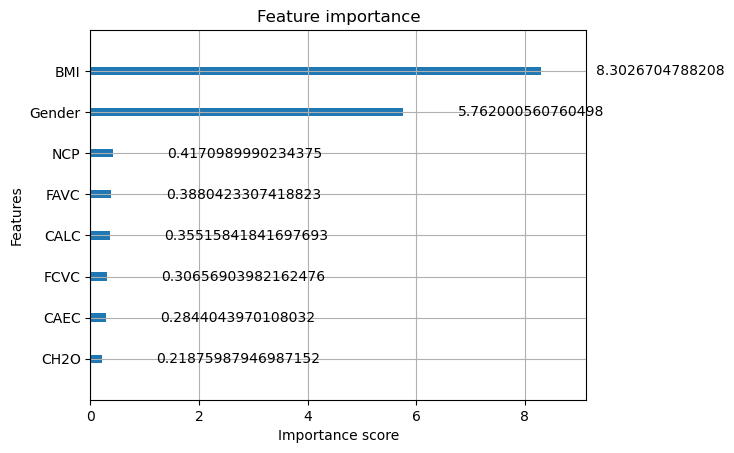

In [42]:
# Plotting the feature importances based on XGBoost model and importance_type='gain'
plot_importance(xgb, importance_type='gain')
plt.show()

In [43]:
# Making a list of top 2 features from sorted_feature_df
top_features = sorted_feature_df['Feature'].head(2).tolist()

In [44]:
top_2_df = df[top_features + ['NObeyesdad']]
top_2_df.head()


,BMI,Gender,NObeyesdad
0,24.386526,0,1
1,24.238227,0,1
2,23.765432,1,1
3,26.851852,1,5
4,28.342381,1,6


In [45]:
# Splitting data into features (X) and target (y)
X = top_2_df.drop(columns=['NObeyesdad'])
y = top_2_df['NObeyesdad']
# Splitting into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost (Model after improvements)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
# Print evaluation metrics:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:41:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9598108747044918

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        54
           1       0.98      0.90      0.94        58
           2       0.93      1.00      0.97        70
           3       0.98      0.95      0.97        60
           4       1.00      0.98      0.99        65
           5       0.93      0.95      0.94        58
           6       0.96      0.93      0.95        58

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



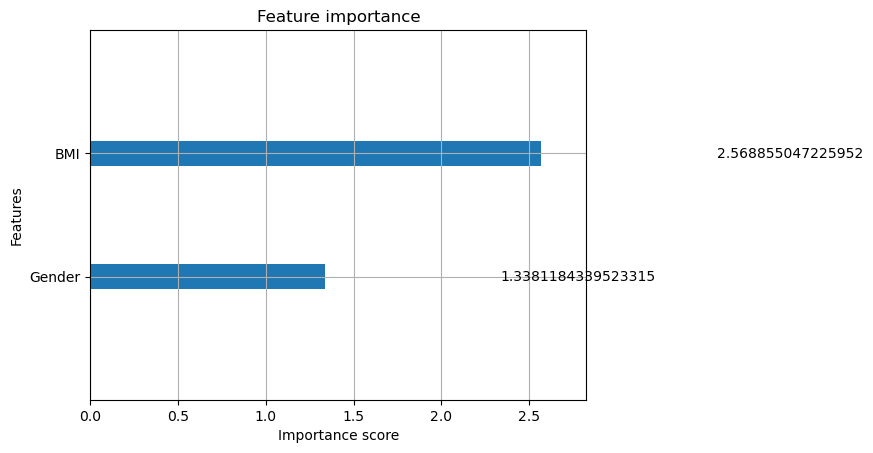

In [46]:
#Üsing the top 2 features to train the model
plot_importance(xgb, importance_type='gain')
plt.show()

In [47]:
data['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [48]:
#save the model for streamlit app
import joblib
joblib.dump(xgb, 'xgb_model.pkl')


['xgb_model.pkl']